# Identifiability and Backdoor Adjustment Formula

This notebook explores identifiability via the IdentifiabiltyChecker, for the simple triangle graph
with nodes X, Y, Z and arrows X->Y and X<-Z->Y.

We verify that the Backdoor Adjustmen Formula is satisfied.

In [1]:
# this makes sure it starts looking for things from the JudeasRx folder down.
import os
import sys
os.chdir('../')
sys.path.insert(0,os.getcwd())
print(os.getcwd())

/home/rrtucci/PycharmProjects/JudeasRx


In [2]:
from DoX_BayesNet import DoX_BayesNet
import DoX_BayesNet
from graphs.BayesNet import *
from nodes.BayesNode import *
from IdentifiabilityChecker import IdentifiabilityChecker
import IdentifiabilityChecker
import imp
from pprint import pprint
import copy as cp
%matplotlib inline

In [3]:
# this cell is for development purposes. Rerun this
# every time there are changes to the code,
# instead of restarting the kernel, which takes much longer.
imp.reload(DoX_BayesNet)
imp.reload(IdentifiabilityChecker)

<module 'IdentifiabilityChecker' from '/home/rrtucci/PycharmProjects/JudeasRx/IdentifiabilityChecker.py'>

In [4]:
def print_bnet(bnet):
    for nd in bnet.nodes:
        print(nd.name, ", parents=" + str([x.name for x in nd.parents]),
              ", children=" + str([x.name for x in nd.children]))
        print(nd.potential)
        print(nd.potential.pot_arr)
        print()

## Building in_bnet

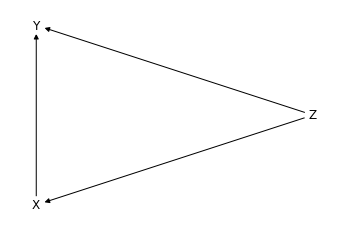

Z , parents=[] , children=['Y', 'X']
['Z']
[0.600 0.400]
[0.600 0.400]

Y , parents=['Z', 'X'] , children=[]
['Z', 'X', 'Y']
[[[0.288 0.712]
  [0.899 0.101]]

 [[0.657 0.343]
  [0.054 0.946]]]
[[[0.288 0.712]
  [0.899 0.101]]

 [[0.657 0.343]
  [0.054 0.946]]]

X , parents=['Z'] , children=['Y']
['Z', 'X']
[[0.882 0.118]
 [0.657 0.343]]
[[0.882 0.118]
 [0.657 0.343]]



In [5]:
def build_in_bnet(draw=True):
    nd_X = BayesNode(0, name="X")
    nd_Y = BayesNode(1, name="Y")
    nd_Z = BayesNode(2, name="Z")

    nd_Y.add_parents({nd_X, nd_Z})
    nd_X.add_parents({nd_Z})

    nodes = {nd_X, nd_Y, nd_Z}
    in_bnet = BayesNet(nodes)

    # in general
    # DiscreteCondPot(False, [y1, y2, y3, x]) refers to P(x| y1, y2, y3)
    nd_Z.potential = DiscreteUniPot(False, nd_Z)  # P(a)
    nd_X.potential = DiscreteCondPot(False, [nd_Z, nd_X])  # P(b| a)
    nd_Y.potential = DiscreteCondPot(False, [nd_Z, nd_X, nd_Y])
    for nd in nodes:
        nd.potential.set_to_random()
        nd.potential.normalize_self()
    if draw:
        in_bnet.draw(algo_num=1)
    return in_bnet

    
in_bnet = build_in_bnet(True)
print_bnet(in_bnet)

## Building doX bnet

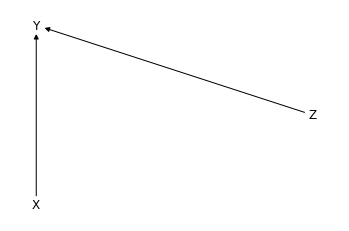

Z , parents=[] , children=['Y']
['Z']
[0.600 0.400]
[0.600 0.400]

Y , parents=['Z', 'X'] , children=[]
['Z', 'X', 'Y']
[[[0.288 0.712]
  [0.899 0.101]]

 [[0.657 0.343]
  [0.054 0.946]]]
[[[0.288 0.712]
  [0.899 0.101]]

 [[0.657 0.343]
  [0.054 0.946]]]

X , parents=[] , children=['Y']
['X']
[1.000 0.000]
[1.000 0.000]



In [6]:
trol_list = []
unobs_nd_list = []
doX_bnet = DoX_BayesNet.DoX_BayesNet(in_bnet,
                        trol_list,
                        unobs_nd_list,
                        x_val=0)
doX_bnet.draw(algo_num=1)
print_bnet(doX_bnet)

## Node Z is control, no unobserved nodes

In [7]:
nd_Z = in_bnet.get_node_named("Z")
trol_list = [nd_Z]
unobs_nd_list = []
doX_bnet.set_trol_and_unobs_nodes(trol_list, unobs_nd_list)
checker = IdentifiabilityChecker.IdentifiabilityChecker(doX_bnet,
                          num_1world_samples=50000,
                          num_worlds=3)
checker.set_query_bds_and_stats()
print("control nodes:",
      [nd.name for nd in checker.trol_list])
print("control_coords_to_query_bds (low, high):")
pprint(checker.get_query_bds())
print("control_coords_to_query_stats (mu, sigma):")
pprint(checker.get_query_stats())

world 0
world 1
world 2
control nodes: ['Z']
control_coords_to_query_bds (low, high):
{(0,): array([0.712, 0.713]), (1,): array([0.342, 0.343])}
control_coords_to_query_stats (mu, sigma):
{(0,): array([7.123e-01, 3.933e-04]), (1,): array([0.343, 0.001])}


## Node Z is unobserved, no control nodes

In [8]:
nd_Z = in_bnet.get_node_named("Z")
trol_list = []
unobs_nd_list = [nd_Z]
doX_bnet.set_trol_and_unobs_nodes(trol_list, unobs_nd_list)
checker = IdentifiabilityChecker.IdentifiabilityChecker(doX_bnet,
                          num_1world_samples=50000,
                          num_worlds=20)
checker.set_query_bds_and_stats()
print("control nodes:",
      [nd.name for nd in checker.trol_list])
print("control_coords_to_query_bds (low, high):")
pprint(checker.get_query_bds())
print("control_coords_to_query_stats (mu, sigma):")
pprint(checker.get_query_stats())

world 0
world 1
world 2
world 3
world 4
world 5
world 6
world 7
world 8
world 9
world 10
world 11
world 12
world 13
world 14
world 15
world 16
world 17
world 18
world 19
control nodes: []
control_coords_to_query_bds (low, high):
{(): array([0.389, 0.683])}
control_coords_to_query_stats (mu, sigma):
{(): array([0.515, 0.081])}


## No unobserved or control nodes

In [9]:
trol_list = []
unobs_nd_list = []
doX_bnet.set_trol_and_unobs_nodes(trol_list, unobs_nd_list)
checker = IdentifiabilityChecker.IdentifiabilityChecker(doX_bnet,
                          num_1world_samples=50000,
                          num_worlds=3)
checker.set_query_bds_and_stats()
print("control nodes:",
      [nd.name for nd in checker.trol_list])
print("control_coords_to_query_bds (low, high):")
pprint(checker.get_query_bds())
print("control_coords_to_query_stats (mu, sigma):")
pprint(checker.get_query_stats())

world 0
world 1
world 2
control nodes: []
control_coords_to_query_bds (low, high):
{(): array([0.470, 0.472])}
control_coords_to_query_stats (mu, sigma):
{(): array([0.472, 0.001])}


Next we check that the Backdoor Adjustment Formula holds.
$$P(Y=1|do(X)=0) = \sum_z P(y|x,z)P(z)$$

In [10]:
nd_Z = doX_bnet.get_node_named("Z")
nd_Y = doX_bnet.get_node_named("Y")
nd_X = doX_bnet.get_node_named("X")
pot_YZbX = nd_Y.potential*nd_Z.potential
pot_YbX = pot_YZbX.get_new_marginal([nd_X, nd_Y])
pot_YbX.set_to_transpose([nd_X, nd_Y])
print(pot_YbX.pot_arr)

[[0.526 0.474]
 [0.354 0.646]]
